In [2]:
from umap_ import *

In [50]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline
import seaborn as sns
import umap.umap_ as umap
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import networkx as nx
import plotly.graph_objects as go
import math
import plotly

In [6]:
sns.set(style='white', context='poster', rc={'figure.figsize':(10,8)})

In [7]:
data1,y = make_blobs(centers=5, n_samples=100,n_features=2,random_state=16, cluster_std=1)

In [8]:
data1

array([[ -7.15968445,   9.65361273],
       [ -1.23984519, -10.0937277 ],
       [  2.97103774,  -7.0585322 ],
       [ -4.88577606,   1.01968697],
       [ -8.12101326,   8.05104977],
       [  5.03427052,  -8.65249568],
       [ -6.71613944,  -0.23997325],
       [  3.76608046,  -6.02013677],
       [  3.09906749,  -6.4822876 ],
       [ -8.09979342,   9.64147742],
       [ -0.0175327 ,  -8.17443886],
       [ -9.14302524,   7.88155435],
       [ -3.11150891,  -6.08768778],
       [  1.17893261,  -8.83401542],
       [ -7.75110716,   7.13736579],
       [ -6.87235298,   1.0429734 ],
       [ -4.99776397,   2.00630126],
       [ -8.58402534,   7.02571252],
       [  4.35106103,  -7.75260822],
       [ -4.81821366,   1.12189909],
       [ -2.26944919,  -4.42553482],
       [ -5.8766981 ,   2.34773084],
       [ -8.67257692,   8.48447749],
       [ -0.97989043,  -6.35968225],
       [  3.43463869,  -6.57215482],
       [ -1.84295227,  -5.95633705],
       [ -6.61433738,   3.02834339],
 

In [82]:
x1 = np.linspace(0, 20, 30)
x2 = 10*np.sin(2*np.pi*0.05*x1)
noise = np.random.normal(0,1,30)
x2= x2+noise

In [83]:
data= []
for i in range(0,30):
    data.append([x1[i],x2[i]])
data = np.array(data)
data

array([[  0.        ,  -1.52030456],
       [  0.68965517,   2.60641128],
       [  1.37931034,   4.79447147],
       [  2.06896552,   7.08700753],
       [  2.75862069,   5.60022257],
       [  3.44827586,  10.98228909],
       [  4.13793103,  10.46228885],
       [  4.82758621,  10.40009566],
       [  5.51724138,  10.30992523],
       [  6.20689655,   9.13095449],
       [  6.89655172,   9.27677185],
       [  7.5862069 ,   8.53480083],
       [  8.27586207,   5.0601599 ],
       [  8.96551724,   3.0090309 ],
       [  9.65517241,   1.62611661],
       [ 10.34482759,  -1.26138749],
       [ 11.03448276,  -2.63025969],
       [ 11.72413793,  -2.69959079],
       [ 12.4137931 ,  -4.80078301],
       [ 13.10344828,  -8.30125923],
       [ 13.79310345,  -9.58903278],
       [ 14.48275862,  -9.26211802],
       [ 15.17241379, -11.14295497],
       [ 15.86206897, -10.75980394],
       [ 16.55172414,  -9.78349765],
       [ 17.24137931,  -7.36803735],
       [ 17.93103448,  -5.06345314],
 

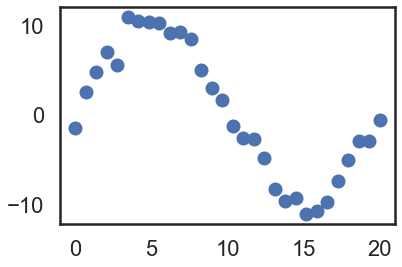

In [84]:
plt.scatter(data[:,0],data[:,1])

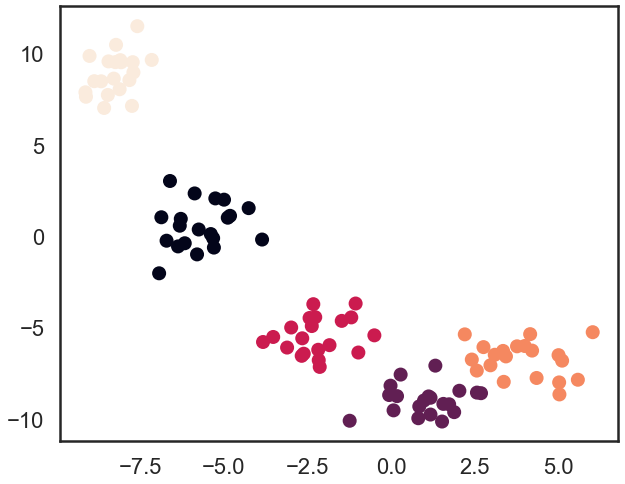

In [12]:
plt.scatter(data1[:,0],data1[:,1],c=y)

In [85]:
X,s,r = fuzzy_simplicial_set(data,n_neighbors = 3,random_state=np.random.RandomState(), metric='euclidean')

In [15]:
X.shape

(30, 30)

In [86]:
G = nx.from_scipy_sparse_matrix(X)

<function matplotlib.pyplot.show(*args, **kw)>

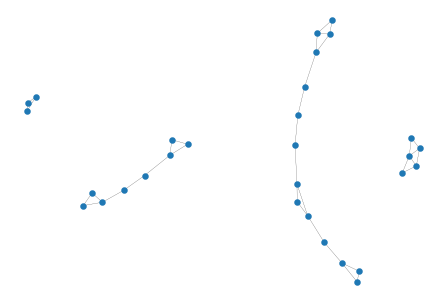

In [87]:
my_pos = nx.spring_layout(G,seed =11)
nx.draw(G, pos= my_pos, with_labels = False, width = 0.2,node_size =20, font_size = 18)
plt.show

In [88]:
knn_indices, knn_dists, _ = nearest_neighbors(
            data, n_neighbors=3, metric='euclidean', metric_kwds={}, angular='False', random_state=np.random.RandomState(), verbose='False'
        )

Thu Aug 13 13:08:28 2020 Finding Nearest Neighbors
Thu Aug 13 13:08:28 2020 Building RP forest with 5 trees
Thu Aug 13 13:08:28 2020 NN descent for 5 iterations
	 0  /  5
	 1  /  5
Thu Aug 13 13:08:28 2020 Finished Nearest Neighbor Search


In [89]:
sigmas, rhos = smooth_knn_dist(
        knn_dists, float(15), local_connectivity=float(1),
    )

In [33]:
knn_dists[1]

array([0.        , 2.36723445, 3.06737267])

<function matplotlib.pyplot.show(*args, **kw)>

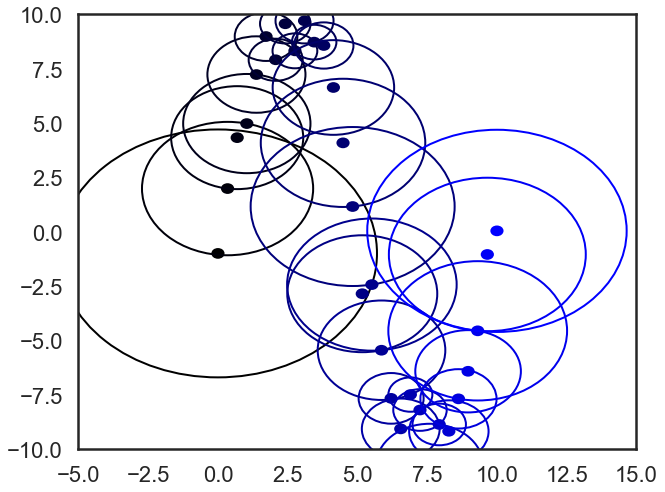

In [32]:
fig,ax = plt.subplots()

for i in range(0,len(sigmas)):
    circle = plt.Circle((data[i,0], data[i,1]), max(knn_dists[i]),fill=False, color =(0, 0, i/29, 1))
    point = plt.Circle((data[i,0], data[i,1]), 0.2 ,fill=True, color =(0, 0, i/29, 1))
    ax.add_artist(circle)
    ax.add_artist(point)
#ax.scatter(data[:,0],data[:,1], c=(0, 0, i/29, 1))
ax.set_xlim((-5,15))
ax.set_ylim((-10, 10))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

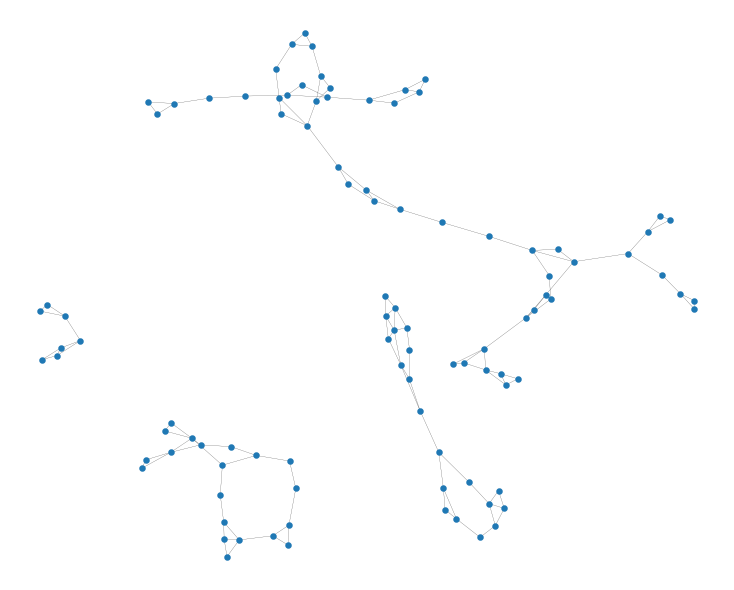

In [34]:
X,s,r = fuzzy_simplicial_set(data1,n_neighbors = 3,random_state=np.random.RandomState(), metric='euclidean')
G = nx.from_scipy_sparse_matrix(X)
my_pos = nx.spring_layout(G,seed =11)
nx.draw(G, pos= my_pos, with_labels = False, c=y, width = 0.2,node_size =20, font_size = 18)
plt.show

In [35]:
knn_indices, knn_dists, _ = nearest_neighbors(
            data1, n_neighbors=3, metric='euclidean', metric_kwds={}, angular='False', random_state=np.random.RandomState(), verbose='False'
        )
sigmas, rhos = smooth_knn_dist(
        knn_dists, float(15), local_connectivity=float(1),
    )

Thu Aug 13 11:50:13 2020 Finding Nearest Neighbors
Thu Aug 13 11:50:13 2020 Building RP forest with 5 trees
Thu Aug 13 11:50:13 2020 NN descent for 7 iterations
	 0  /  7
	 1  /  7
	 2  /  7
	 3  /  7
Thu Aug 13 11:50:13 2020 Finished Nearest Neighbor Search


<function matplotlib.pyplot.show(*args, **kw)>

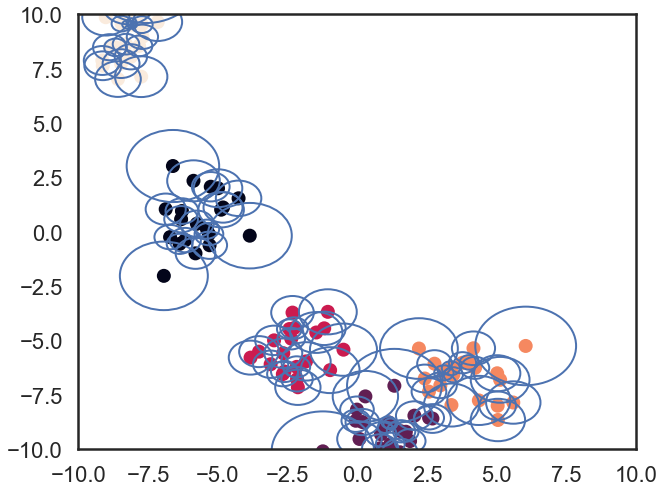

In [36]:
fig,ax = plt.subplots()

for i in range(0,len(sigmas)):
    circle = plt.Circle((data1[i,0], data1[i,1]), max(knn_dists[i]),fill=False, color ='b')
    ax.add_artist(circle)
ax.scatter(data1[:,0],data1[:,1],c=y)
ax.set_xlim((-10,10))
ax.set_ylim((-10, 10))
plt.show

In [102]:
my_shapes= []
for i in range(0,len(sigmas)):
    my_shapes.append(dict(
            type="circle",
            xref="x",
            yref="y",
            x0=(data[i,0] - (max(knn_dists[i]))),
            y0=(data[i,1]- (max(knn_dists[i]))),
            x1=(data[i,0] + (max(knn_dists[i]))),
            y1=(data[i,1]+ (max(knn_dists[i]))),
            #line_color="LightSeaGreen",
            fillcolor = 'PaleTurquoise',
            opacity = 0.5,
            layer = 'below'
        ))

In [103]:
fig = go.Figure(go.Scatter(x= data[:,0],y =data[:,1], mode = 'markers'))

In [104]:
for i in range(0,len(sigmas)):
    #circle = plt.Circle((data[i,0], data[i,1]), max(knn_dists[i]),fill=False, color =(0, 0, i/29, 1))
    #point = plt.Circle((data[i,0], data[i,1]), 0.2 ,fill=True, color =(0, 0, i/29, 1))
    fig.update_layout(
    shapes=my_shapes
      )
fig.update_xaxes(range=[-15, 25], zeroline=False)
fig.update_yaxes(range=[-20, 20])
fig.update_layout(width=800, height=800)

plotly.offline.plot(fig)

'temp-plot.html'

In [ ]:
from matplotlib.patches import Ellipse

def draw_simple_ellipse(position, width, height, angle,
                        ax=None, from_size=0.1, to_size=0.5, n_ellipses=3,
                        alpha=0.1, color=None,
                        **kwargs):
    ax = ax or plt.gca()
    angle = (angle / np.pi) * 180
    width, height = np.sqrt(width), np.sqrt(height)
    # Draw the Ellipse
    for nsig in np.linspace(from_size, to_size, n_ellipses):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, alpha=alpha, lw=0, color=color, **kwargs))